<div class="alert alert-block alert-success">
    <b><center>MULTILABEL CLASSFICATION</center></b>
    <b><center>Tensorflow 2를 이용한 MULTILABEL 문제 풀어 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [3]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.0.0'

# Prepare Datas

In [4]:
dfJuice = pd.read_excel("resources/juice.xlsx")

In [5]:
dfJuice

,오랜지,딸기,포도,맛,믹스,매출
0,1,1,1,있다,True,False
1,1,1,0,없다,True,False
2,1,0,1,없다,True,False
3,1,0,0,있다,False,True
4,0,1,1,없다,True,False
5,0,1,0,있다,False,True
6,0,0,1,있다,False,True
7,0,0,0,없다,False,False


# XOR

In [6]:
dfXor = dfJuice.replace({"맛":{"없다":0, "있다":1}})
dfXor

,오랜지,딸기,포도,맛,믹스,매출
0,1,1,1,1,True,False
1,1,1,0,0,True,False
2,1,0,1,0,True,False
3,1,0,0,1,False,True
4,0,1,1,0,True,False
5,0,1,0,1,False,True
6,0,0,1,1,False,True
7,0,0,0,0,False,False


In [7]:
data = dfXor[["오랜지", "딸기", "포도"]].to_numpy()
label = dfXor[["맛"]].values
data.shape, label.shape

((8, 3), (8, 1))

## Generate Model

In [9]:
model = models.Sequential([
    layers.Input([3]),
    layers.Dense(10, activation=tf.keras.activations.sigmoid),
    layers.Dense(100, activation=tf.keras.activations.sigmoid),
    layers.Dense(100, activation=tf.keras.activations.sigmoid),
    layers.Dense(20, activation=tf.keras.activations.sigmoid),
    layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 13,281
Trainable params: 13,281
Non-trainable params: 0
_________________________________________________________________


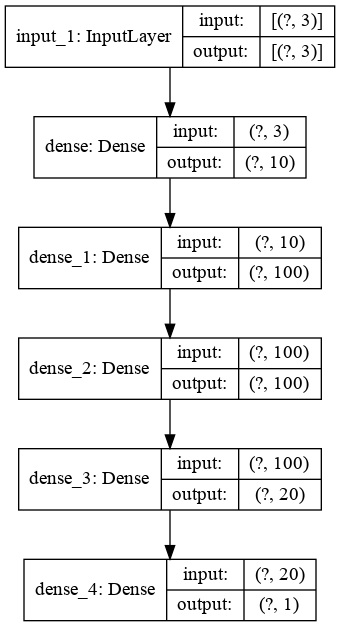

In [10]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [11]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
)

## Training

In [12]:
history = model.fit(
    data, label, epochs=20000, verbose=0
)

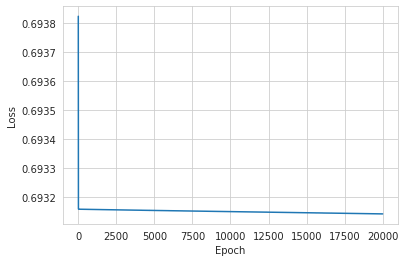

In [13]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.show()

## Predict

In [14]:
predictedAll = np.array([[]])
predictedLabelAll = np.array([[]])
for itemData, itemLabel in zip(data, label):
    predicted = model.predict([itemData.tolist()])
    predictedLabel = np.where(predicted > 0.5, 1, 0)
    predictedAll = np.hstack((predictedAll, predicted))
    predictedLabelAll = np.hstack((predictedLabelAll, predictedLabel))

In [15]:
rsp.showMulti(
    predictedAll.reshape(-1,1),
    predictedLabelAll.reshape(-1,1),
    label
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

# Multi-Label

In [16]:
dfMulti = dfJuice.replace({"맛":{"없다":0, "있다":1}})
dfMulti = dfMulti.astype({"믹스":"int", "매출":"int"})
dfMulti

,오랜지,딸기,포도,맛,믹스,매출
0,1,1,1,1,1,0
1,1,1,0,0,1,0
2,1,0,1,0,1,0
3,1,0,0,1,0,1
4,0,1,1,0,1,0
5,0,1,0,1,0,1
6,0,0,1,1,0,1
7,0,0,0,0,0,0


In [17]:
data = dfMulti[["오랜지", "딸기", "포도"]].to_numpy()
label = dfMulti[["맛", "믹스", "매출"]].values
data.shape, label.shape

((8, 3), (8, 3))

## Generate Model

## Training

## Predict